In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/
!ls

**CLASSIFIER**

In [ ]:
import pandas as pd
import numpy as np

# Le jeu de données est disponible sur le site de l'UCI
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# chargement du jeu de données à partir de l'URL
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

# creation d'un dataframe pour récupérer les données
df_iris = pd.read_csv(url, names=names) #DataFrame

# Conversion du dataframe
array = df_iris.values #necessité de convertir le dataframe en numpy

# Récupération des différentes colonnes
#X matrice représentant les variables prédictives 
X = array[:,0:4] 
#y vecteur : représentant la variable à prédire
y = array[:,4]

# print(X.astype(np.int))
# print(y)

# affichage du nombre de classes et de val
# print ("Nombre d'occurrences par classe : \n",df_iris['Species'].value_counts())
import sklearn
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# création de l'estimateur 
clf.fit(X, y) 

GaussianNB(priors=None, var_smoothing=1e-09)

# Vanilla GAN



Discriminator : 


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


Generator : 


Model: "sequential_11"
____________________________________________________________

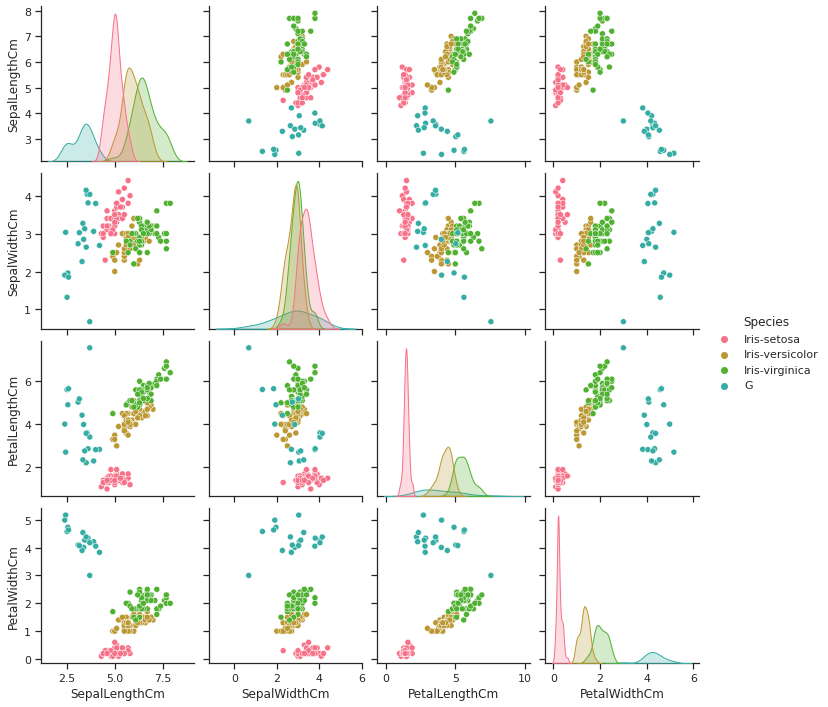

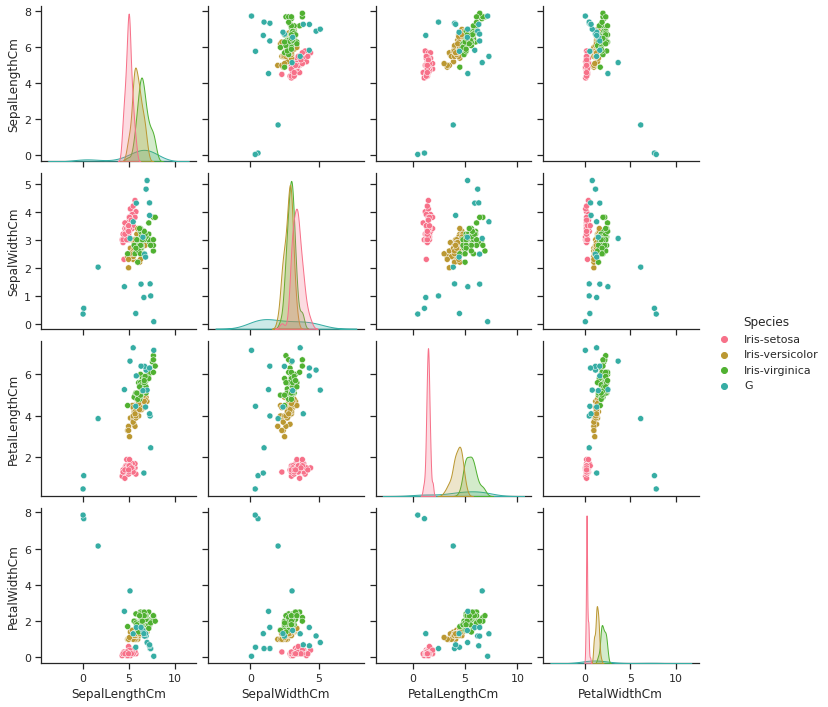

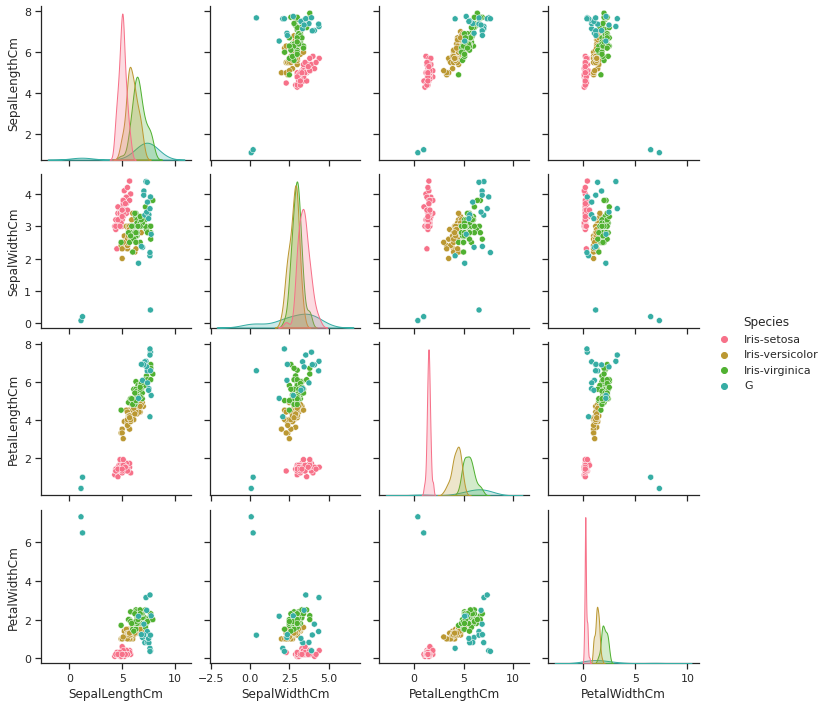

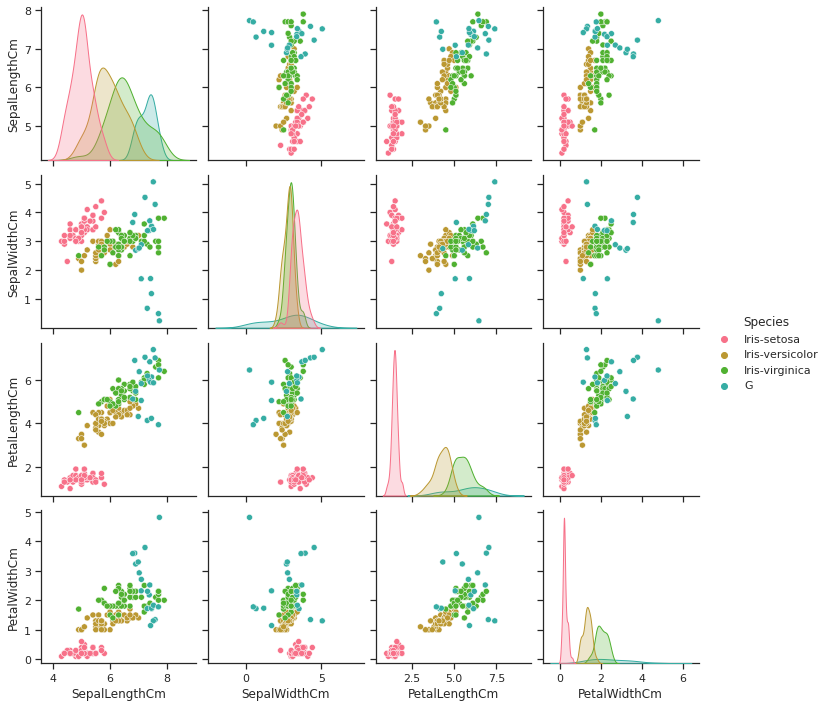

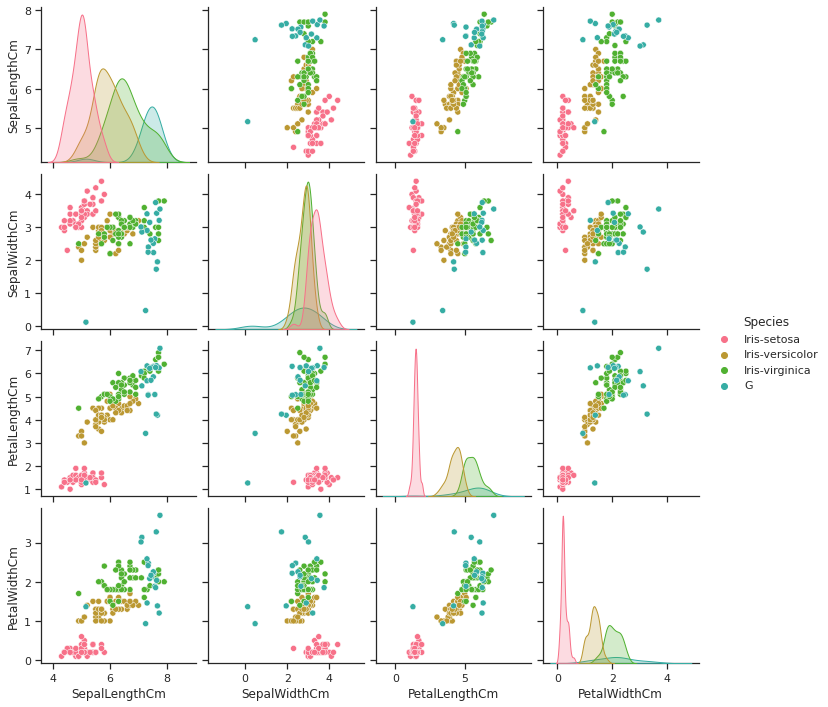

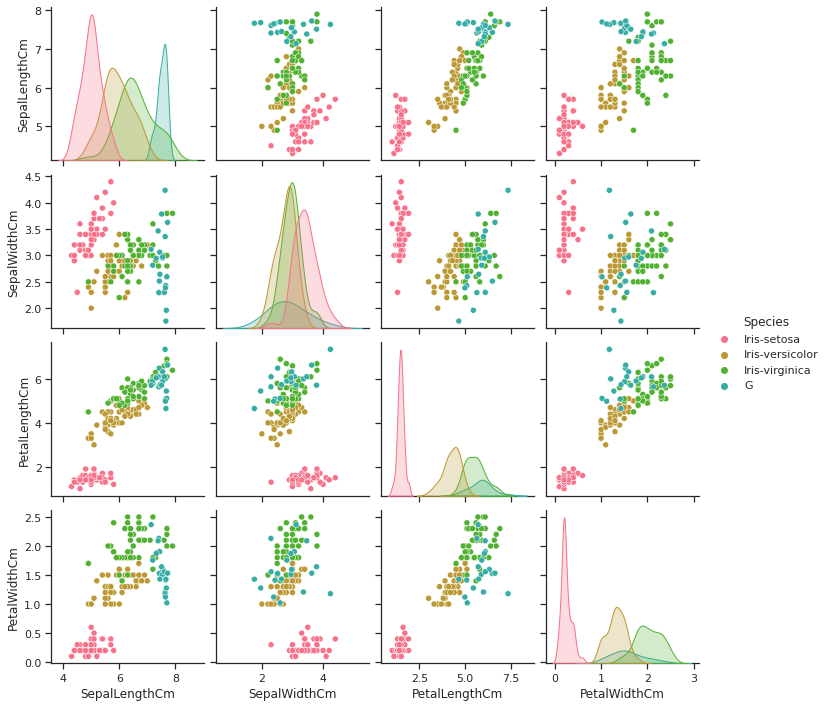

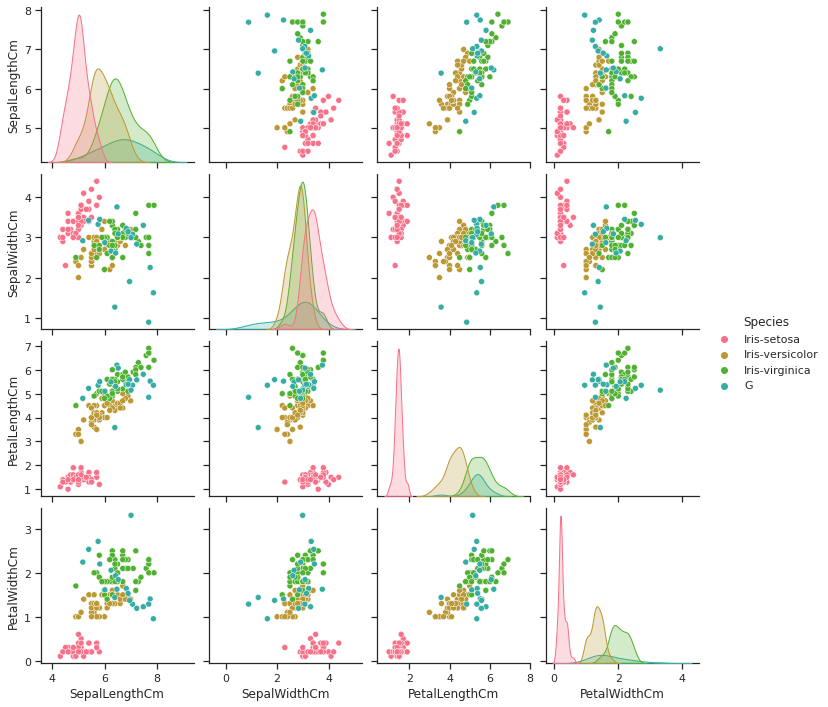

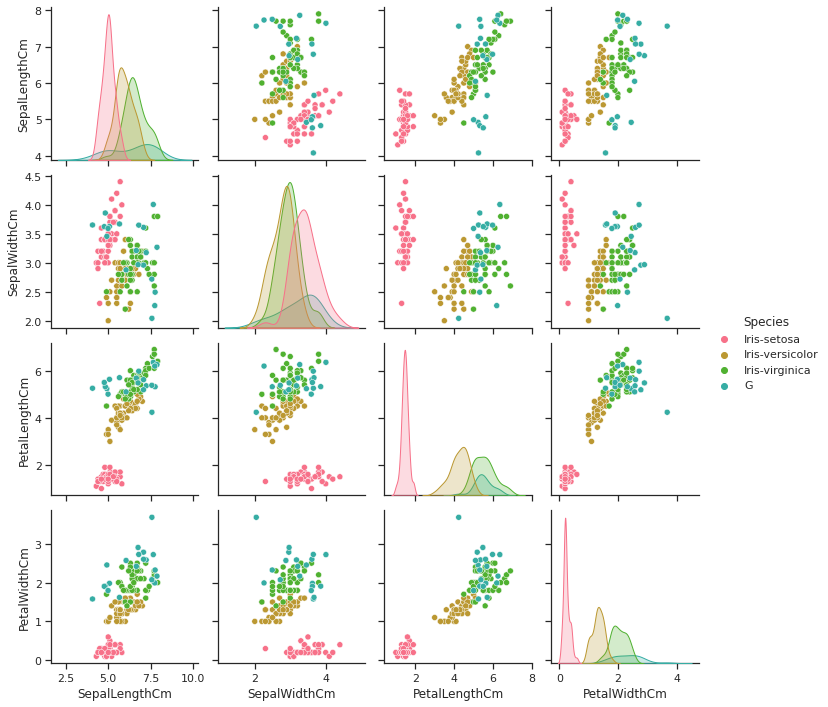

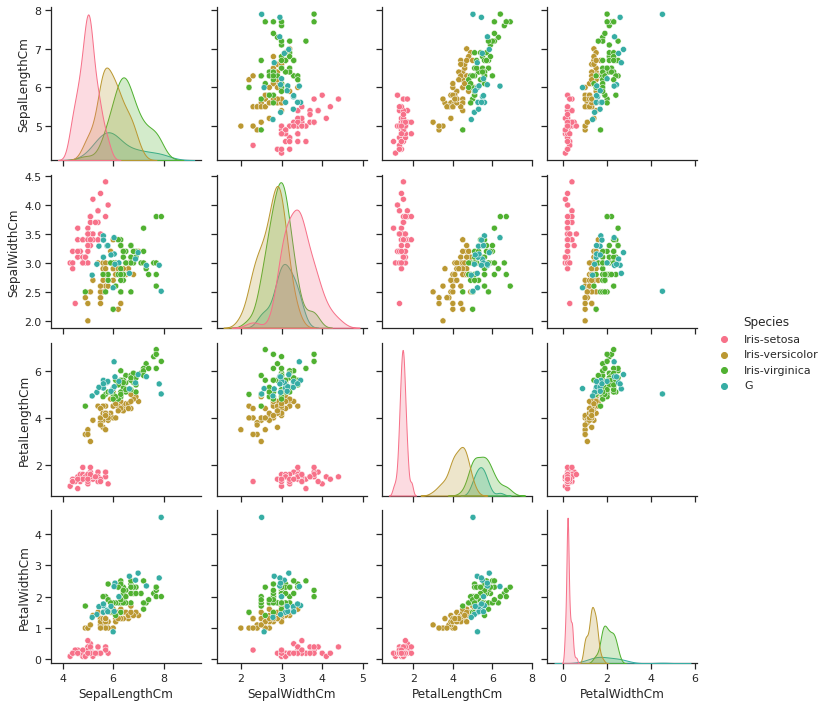

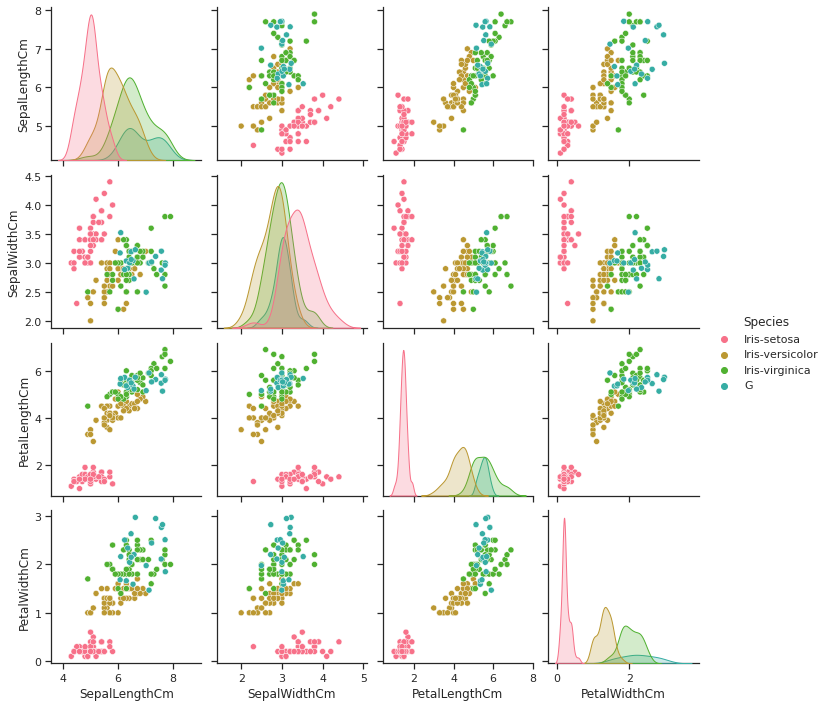

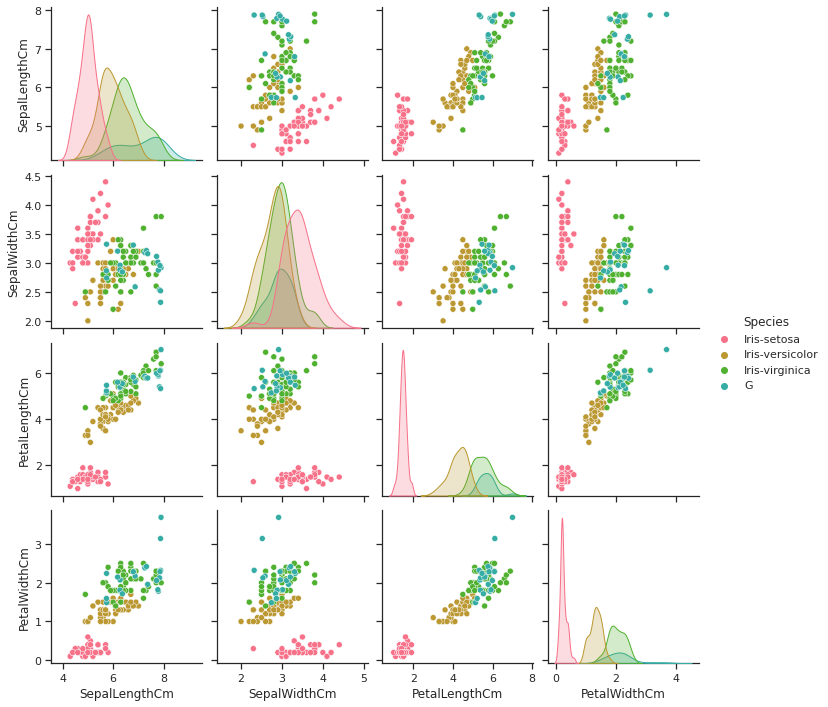

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

class GAN():

    def __init__(self):

        #formats des entrés
        self.latent_dim = 10
        self.vectorSize = 4

        optimizer = Adam(0.0002, 0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        self.generator = self.build_generator()

        # ------ Construction du modèle combiné -------
        z = Input(shape=(self.latent_dim,)) # z input un bruit
        vector = self.generator(z) # z --> vecteur 4-dim
        self.discriminator.trainable = False 
        validity = self.discriminator(vector) #vecteur 4-dim -> validity (1) = 0/1
        
        self.combined = Model(z, validity) #definition du modèle combiné
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def getSample(self):
      return self.sample

    def build_generator(self):

        model = Sequential()

        #Couches
        model.add(Dense(6, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(10))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.vectorSize, activation='tanh'))

        print("\n\nGenerator : \n\n")
        model.summary()#On affiche le résumé
        
        #input & output
        label = Input(shape=(self.latent_dim,))
        vector = model(label)
        
        return Model(label, vector) #On renvoit notre model

    def build_discriminator(self):

        model = Sequential()
        
        #Couches
        model.add(Dropout(0.2, input_shape=(4,)))
        model.add(Dense(10,activation='tanh'))
        model.add(Dense(8,activation='tanh'))
        model.add(Dense(6,activation='tanh'))
        model.add(Dense(1, activation='sigmoid'))

        print("\n\nDiscriminator : \n\n")
        model.summary()#On affiche le résumé
        
        #input & output
        vector = Input(shape=(self.vectorSize, ))
        validity = model(vector)
        
        return Model(vector, validity) #On renvoit notre model

    def train(self, epochs, batch_size=128, sample_interval=50):

        # chargement du jeu de données à partir de l'URL
        url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
        names = ['SepalLengthCm', 'SepalWidthCm', 
                'PetalLengthCm', 'PetalWidthCm', 
                'Species']

        # creation d'un dataframe pour récupérer les données
        self.df_iris = pd.read_csv(url, names=names)

        array = self.df_iris.values #necessité de convertir le dataframe en numpy

        X_train = self.df_iris.iloc[:,0:4].values
        X_train = X_train[101:150]
        y_train = self.df_iris.iloc[101:150,4].values

        # 0 -->setosa, 1 -->versicolor, 2 -->virginica
        encoder =  LabelEncoder()
        y_train = encoder.fit_transform(y_train)

        # y_train = pd.get_dummies(y_train).values
        self.maxVal = np.amax(X_train)
        X_train = X_train / (self.maxVal/2) - 1. #redimensionne --> [-1, 1]
        valid = np.ones((batch_size, 1)) # (20 x 1) de 1
        fake = np.zeros((batch_size, 1)) # (20 x 1) de 0

        print(X_train)
        print(y_train)

        for epoch in range(epochs):
            
            idx = np.random.randint(0, X_train.shape[0], batch_size) #(20, ) tableau d'entiers aleatoires entre 0 et 150
            vectors = X_train[idx] #(20 x 4) le lot (batch)

            noise = np.random.randint(3, size=(batch_size, self.latent_dim)) #(20 x 100)
            gen_vec = self.generator.predict(noise) #(20 x 4)

            d_loss_real = self.discriminator.train_on_batch(vectors, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_vec, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #perte du discriminateur

            noise = np.random.randint(3, size=(batch_size, self.latent_dim)) #(20 x 100)
            g_loss = self.combined.train_on_batch(noise, valid)#perte du générateur (modele combiné)

            if epoch % sample_interval == 0:
              print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            if (epoch/5) % sample_interval == 0:
              self.sample_vectors(epoch)

    def sample_vectors(self, epoch):
      labels = np.random.randint(3, size=(20, self.latent_dim)) #(1x20)
      print("\nepoch : " + str(epoch) + "\n")
      sam = self.generator.predict(labels)
      sam = (sam+1) * self.maxVal/2
      # print(sam)
      self.sample = sam

      labs = np.empty(([sam.shape[0], ]), dtype=str)
      labs[:] = "G"

      df = pd.DataFrame(data=sam, columns=self.df_iris.columns[0:4])
      df[self.df_iris.columns[4]] = labs

      df = pd.concat([self.df_iris, df])
      sns.set(style="ticks")
      sns.set_palette("husl")
      sns.pairplot(df.iloc[:,0:5],hue="Species")
      #sauvegarder dans un fichier texte 

if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=5001, batch_size=20, sample_interval=100)
   

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']
Accuracy : 0.950
Classification Report
              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000         0
         1.0    1.00000   0.95000   0.97436        20

    accuracy                        0.95000        20
   macro avg    0.50000   0.47500   0.48718        20
weighted avg    1.00000   0.95000   0.97436        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


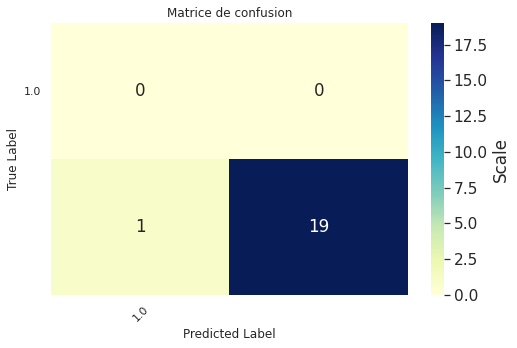

In [ ]:
from MyNLPUtilities import *

y_pred = clf.predict(gan.getSample())
print(y_pred)

encoder =  LabelEncoder()
y_pred = encoder.fit_transform(y_pred)
MyshowAllScores(np.ones(20),y_pred)


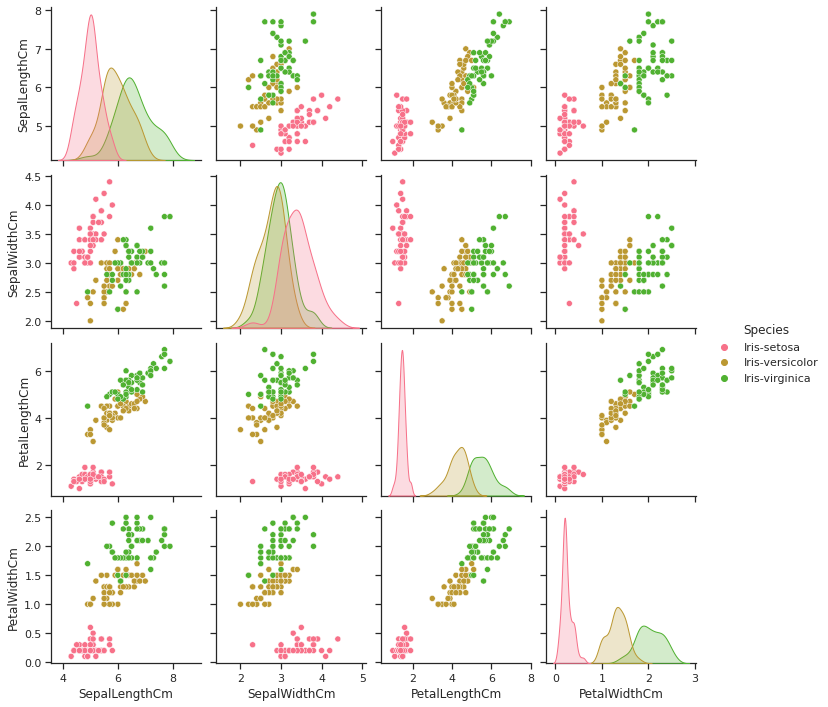

In [ ]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df_iris,hue="Species")

#CGAN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Le jeu de données est disponible sur le site de l'UCI
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# chargement du jeu de données à partir de l'URL
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

# creation d'un dataframe pour récupérer les données
df_iris = pd.read_csv(url, names=names) #DataFrame
display(df_iris)

# affichage du nombre de classes et de val
print ("Nombre d'occurrences par classe : \n",df_iris['Species'].value_counts())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Nombre d'occurrences par classe : 
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


In [ ]:
spe = df_iris['Species']
spe2 = []
for i in spe:
  if i == 'Iris-setosa':
    spe2.append(0)
  elif i == 'Iris-versicolor':
    spe2.append(1)
  elif i == 'Iris-virginica':
    spe2.append(2)

a = tf.keras.utils.to_categorical(spe2, num_classes=3)
df_iris['Iris-setosa'] = a[:,0]
df_iris['Iris-versicolor'] = a[:,1]
df_iris['Iris-virginica'] = a[:,2]

df_iris = df_iris.drop(['Species'], axis=1)
display(df_iris)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [ ]:
# Load custom functions

import GAN_171103

# For reloading after making changes
import importlib
importlib.reload(GAN_171103) 
from GAN_171103 import *

rand_dim = 10
base_n_count = 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True 

label_cols = [ i for i in df_iris.columns if 'Iris' in i ]
data_cols = [ i for i in df_iris.columns if i not in label_cols ]

train_no_label = df_iris[ data_cols ] / df_iris[ data_cols ].max() # scale to random noise size, one less thing to learn

print(label_cols)
print(data_cols)
print(train_no_label)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.645570      0.795455       0.202899          0.08
1         0.620253      0.681818       0.202899          0.08
2         0.594937      0.727273       0.188406          0.08
3         0.582278      0.704545       0.217391          0.08
4         0.632911      0.818182       0.202899          0.08
..             ...           ...            ...           ...
145       0.848101      0.681818       0.753623          0.92
146       0.797468      0.568182       0.724638          0.76
147       0.822785      0.681818       0.753623          0.80
148       0.784810      0.772727       0.782609          0.92
149       0.746835      0.681818       0.739130          0.72

[150 rows x 4 columns]


data_dim:  4
data_cols:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
label_dim:  3
label_cols:  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_63 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_64 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
concatenate_26 (Concatenate)    (None, 13)           0           input_63[0][0]                   
                                                                 input_64[0][0]                   
_________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Step: 0 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.7103, 0.6983, 0.6946, 1.0000
D Real - D Gen: -0.0038


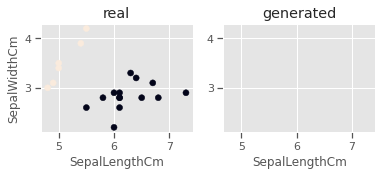

Step: 100 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.7822, 0.6929, 0.7523, 0.6500
D Real - D Gen: 0.0594


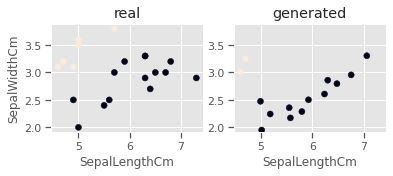

Step: 200 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.7158, 0.7037, 0.7168, 0.8000
D Real - D Gen: 0.0131


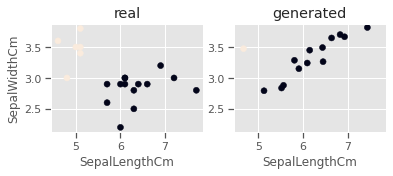

Step: 300 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.7040, 0.6909, 0.7018, 0.5000
D Real - D Gen: 0.0109


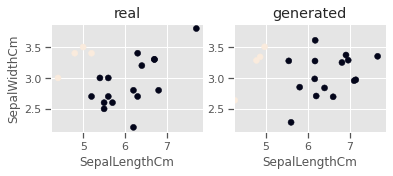

Step: 400 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6956, 0.6943, 0.6947, 0.5500
D Real - D Gen: 0.0004


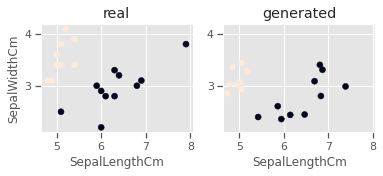

Step: 500 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6947, 0.6930, 0.6938, 0.5500
D Real - D Gen: 0.0008


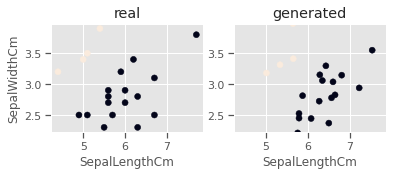

Step: 600 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6943, 0.6935, 0.6937, 0.5000
D Real - D Gen: 0.0002


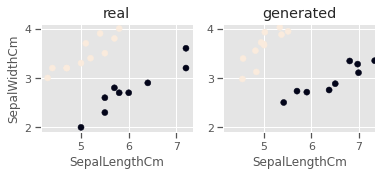

Step: 700 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6936, 0.6932, 0.6937, 0.7500
D Real - D Gen: 0.0004


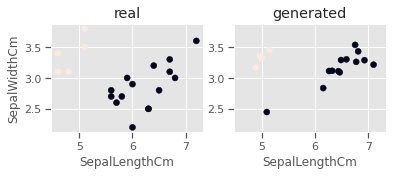

Step: 800 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6935, 0.6932, 0.6935, 0.5500
D Real - D Gen: 0.0003


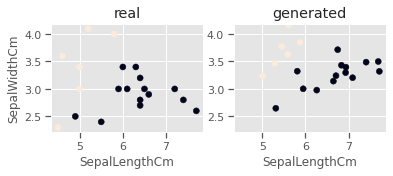

Step: 900 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6940, 0.6935, 0.6947, 0.6000
D Real - D Gen: 0.0012


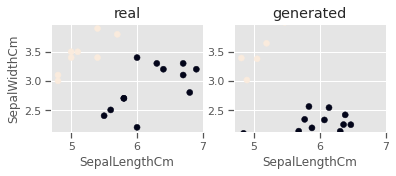

Step: 1000 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6933, 0.6937, 0.6931, 0.8500
D Real - D Gen: -0.0006


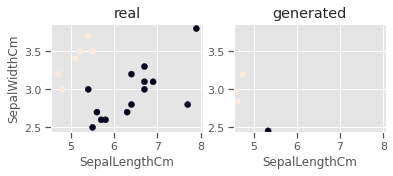

Step: 1100 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6926, 0.6940, 0.6926, 0.6500
D Real - D Gen: -0.0014


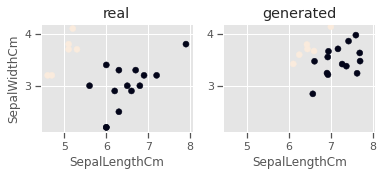

Step: 1200 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6928, 0.6938, 0.6928, 0.8000
D Real - D Gen: -0.0010


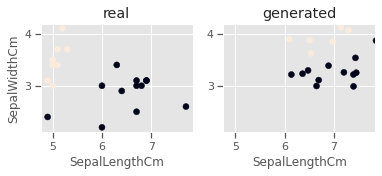

Step: 1300 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6930, 0.6937, 0.6930, 0.7500
D Real - D Gen: -0.0007


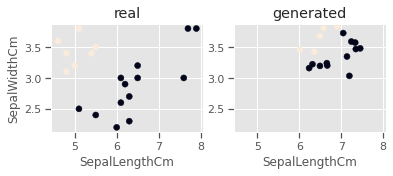

Step: 1400 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6935, 0.6936, 0.6935, 0.6500
D Real - D Gen: -0.0001


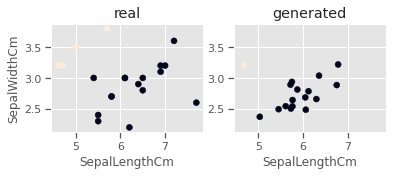

Step: 1500 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6927, 0.6939, 0.6927, 0.5000
D Real - D Gen: -0.0012


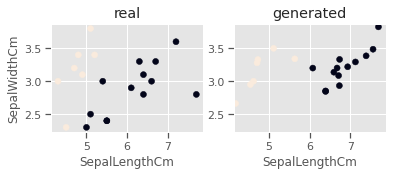

Step: 1600 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6929, 0.6937, 0.6929, 0.6500
D Real - D Gen: -0.0009


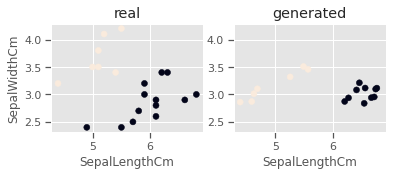

Step: 1700 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6931, 0.6935, 0.6931, 0.8000
D Real - D Gen: -0.0004


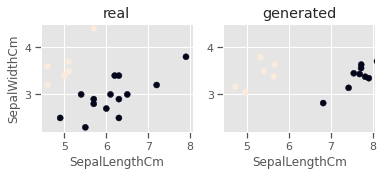

Step: 1800 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6932, 0.6934, 0.6932, 0.9500
D Real - D Gen: -0.0002


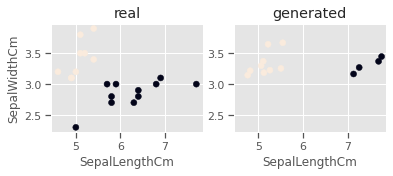

Step: 1900 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6932, 0.6933, 0.6932, 0.8000
D Real - D Gen: -0.0001


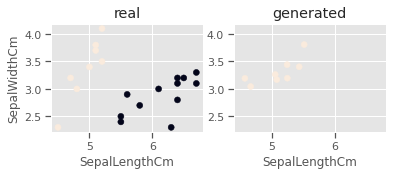

Step: 2000 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6933, 0.6933, 0.6933, 0.7500
D Real - D Gen: 0.0000


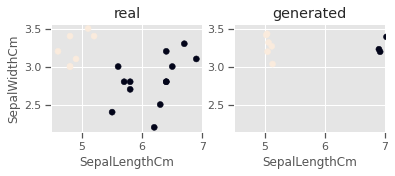

Step: 2100 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6933, 0.6932, 0.6933, 0.6000
D Real - D Gen: 0.0001


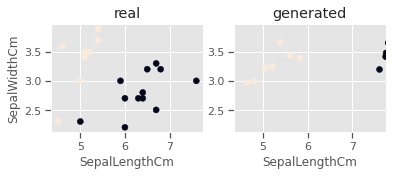

Step: 2200 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6933, 0.6932, 0.6933, 0.8000
D Real - D Gen: 0.0002


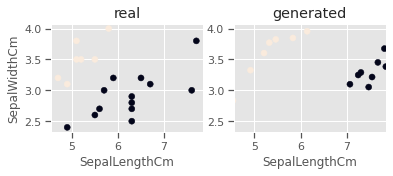

Step: 2300 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6932, 0.6934, 0.8000
D Real - D Gen: 0.0002


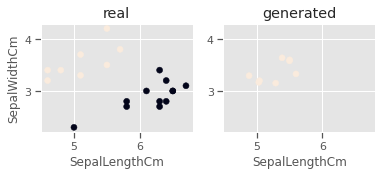

Step: 2400 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6932, 0.6934, 0.8000
D Real - D Gen: 0.0002


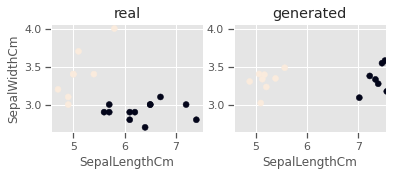

Step: 2500 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6931, 0.6934, 0.6500
D Real - D Gen: 0.0002


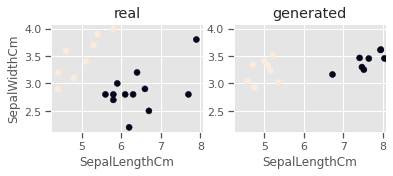

Step: 2600 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6931, 0.6934, 0.7000
D Real - D Gen: 0.0003


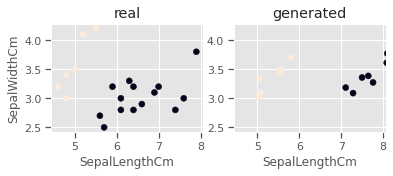

Step: 2700 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6931, 0.6934, 0.8000
D Real - D Gen: 0.0003


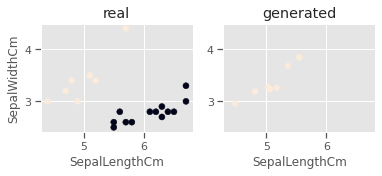

Step: 2800 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6931, 0.6934, 0.8000
D Real - D Gen: 0.0003


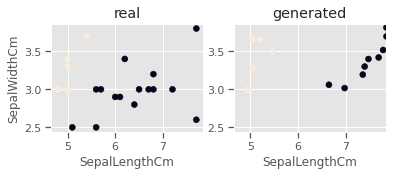

Step: 2900 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6931, 0.6934, 0.8500
D Real - D Gen: 0.0003


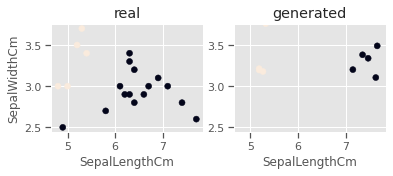

Step: 3000 of 3001.
Losses: G, D Gen, D Real, Xgb: 0.6934, 0.6931, 0.6934, 0.8500
D Real - D Gen: 0.0003


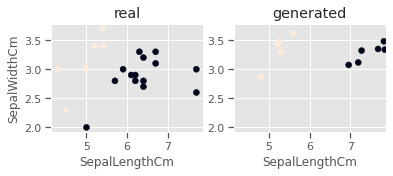

In [ ]:
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

# adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
adversarial_training_GAN(arguments, df_iris, data_cols=data_cols, label_cols=label_cols ) # CGAN

In [ ]:
seed = 17

data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
generator_model.load_weights('cache/CGAN_generator_model_weights_step_500.h5')

In [ ]:
# Now generate some new data

test_size = 150 # Equal to all of the fraud cases

x = get_data_batch(train_no_label, test_size, seed=seed)
z = np.random.normal(size=(test_size, rand_dim))
if with_class:
    labels = x[:,-label_dim:]
    labels[0:50] = [1, 0, 0]
    labels[50:100] = [0, 1, 0]
    labels[100:150] = [0, 0, 1]
    print(labels)
    g_z = generator_model.predict([z, labels])
else:
    g_z = generator_model.predict(z)



[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

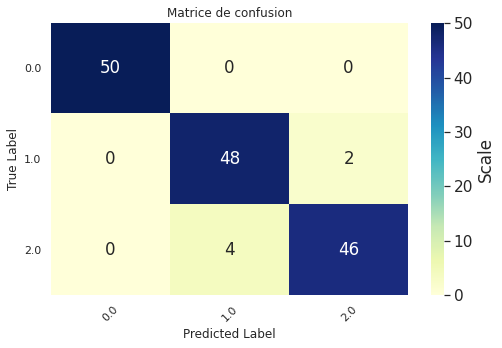

In [ ]:
vector_sample = g_z[:,:4]

# print(g_z) #somme des proba != 1 wtf
print(clf.predict(vector_sample))
classes = clf.predict(vector_sample)

from MyNLPUtilities import *

encoder =  LabelEncoder()
classes2 = encoder.fit_transform(classes)
l = np.zeros(150)
l[50:100] = 1
l[100:150] = 2
MyshowAllScores(l,classes2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.068425,3.156235,1.100036,0.270967,Iris-setosa
27,5.159547,2.990485,1.014901,0.220477,Iris-setosa
28,5.054068,3.450918,1.122925,0.300512,Iris-setosa
29,5.898852,3.311966,1.566396,0.361637,Iris-setosa
30,5.503510,3.540585,1.443824,0.428094,Iris-setosa
...,...,...,...,...,...
119,6.274014,3.311991,4.743514,2.468522,Iris-virginica
120,6.287885,2.988130,4.858912,2.246336,Iris-virginica
122,6.310259,2.670799,4.693512,2.117152,Iris-virginica
109,6.314969,3.168805,4.490551,2.123137,Iris-virginica


Nombre d'occurrences par classe : 
 Iris-versicolor    52
Iris-setosa        50
Iris-virginica     48
Name: Species, dtype: int64


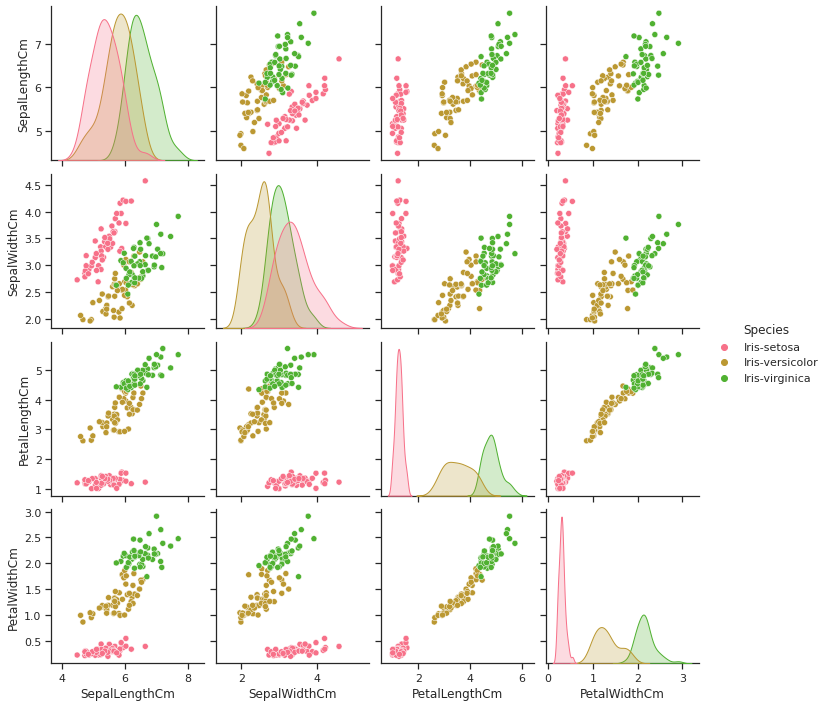

In [ ]:
df = pd.DataFrame(data=vector_sample, columns=df_iris.columns[0:4])
df['Species'] = classes
df = df.sort_values(by=['Species'])
display(df)
print ("Nombre d'occurrences par classe : \n",df['Species'].value_counts())

import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,0:5],hue="Species")

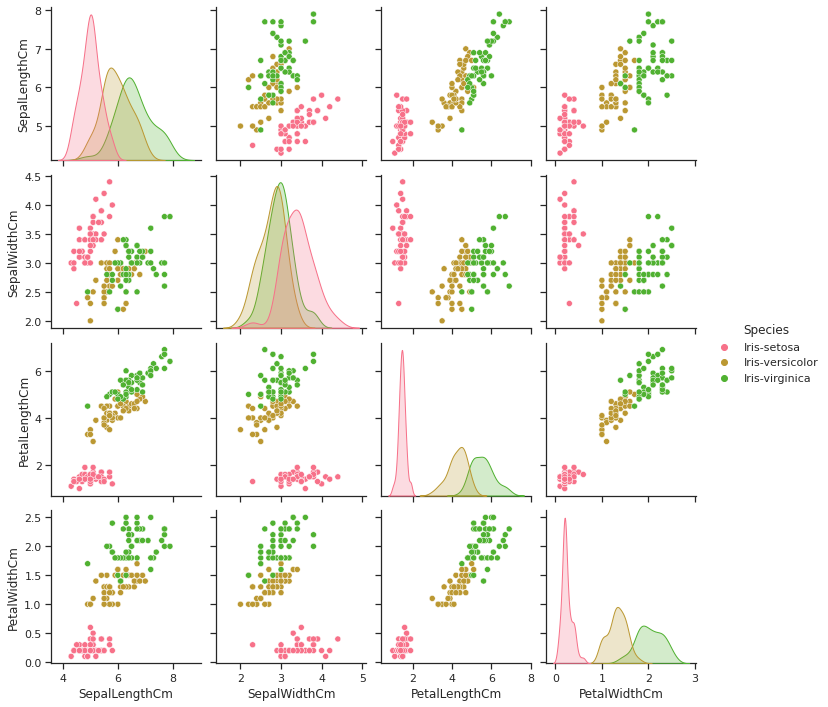

In [ ]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df_iris,hue="Species")

# WGAN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Le jeu de données est disponible sur le site de l'UCI
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# chargement du jeu de données à partir de l'URL
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

# creation d'un dataframe pour récupérer les données
df_iris = pd.read_csv(url, names=names) #DataFrame
# display(df_iris)

# affichage du nombre de classes et de val
# print ("Nombre d'occurrences par classe : \n",df_iris['Species'].value_counts())

# Conversion du dataframe
array = df_iris.values #necessité de convertir le dataframe en numpy

# Récupération des différentes colonnes
#X matrice représentant les variables prédictives 
X_train = array[:,0:4] 
#y vecteur : représentant la variable à prédire
y_train = array[:,4]

X_train = X_train[100:150]
y_train = y_train[100:150]

# X_train = np.array(X_train, dtype=np.float32)

WGAN CODE TENSORFLOW

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os


mb_size = 10
X_dim = 4
z_dim = 10
h_dim = 10

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


X = tf.placeholder(tf.float32, shape=[None, X_dim])

D_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
D_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

D_W2 = tf.Variable(xavier_init([h_dim, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


z = tf.placeholder(tf.float32, shape=[None, z_dim])

G_W1 = tf.Variable(xavier_init([z_dim, h_dim]))
G_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

G_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

theta_G = [G_W1, G_W2, G_b1, G_b2]


def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)
    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    out = tf.matmul(D_h1, D_W2) + D_b2
    return out


G_sample = generator(z)
D_real = discriminator(X)
D_fake = discriminator(G_sample)

D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake)
G_loss = -tf.reduce_mean(D_fake)

D_solver = (tf.train.RMSPropOptimizer(learning_rate=1e-4)
            .minimize(-D_loss, var_list=theta_D))
G_solver = (tf.train.RMSPropOptimizer(learning_rate=1e-4)
            .minimize(G_loss, var_list=theta_G))

clip_D = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in theta_D]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

nb_epoch = 3000

for it in range(nb_epoch+1):
    for _ in range(5):
        X_mb, _ = X_train,y_train

        _, D_loss_curr, _ = sess.run(
            [D_solver, D_loss, clip_D],
            feed_dict={X: X_mb, z: sample_z(mb_size, z_dim)}
        )

    _, G_loss_curr = sess.run(
        [G_solver, G_loss],
        feed_dict={z: sample_z(mb_size, z_dim)}
    )

    if it % 100 == 0:
        print('Iter: {}; D loss: {:.4}; G_loss: {:.4}'
              .format(it, D_loss_curr, G_loss_curr))

        if it % nb_epoch == 0:
            samples = sess.run(G_sample, feed_dict={z: sample_z(50, z_dim)})

            print(samples)

Iter: 0; D loss: 0.00052; G_loss: -0.0002115
[[0.3156458  0.91928697 0.72413385 0.6412076 ]
 [0.5745086  0.52979934 0.6896644  0.5642326 ]
 [0.8185828  0.5164963  0.52198505 0.40205935]
 [0.40179294 0.6714295  0.5631958  0.4718297 ]
 [0.5666066  0.47933912 0.6621324  0.5734753 ]
 [0.3145892  0.8202161  0.78686714 0.6794435 ]
 [0.8358363  0.4973911  0.7077298  0.5172242 ]
 [0.5068312  0.57663506 0.53649807 0.48280945]
 [0.45364103 0.6301697  0.7689674  0.5407002 ]
 [0.3004763  0.71474123 0.574101   0.6682234 ]
 [0.3153502  0.7451092  0.7994739  0.70264715]
 [0.51888514 0.5831238  0.65472543 0.34993684]
 [0.56172484 0.60044914 0.67060286 0.42420772]
 [0.83729744 0.55580246 0.58217055 0.54114634]
 [0.65299135 0.71571606 0.60446364 0.48329842]
 [0.6381795  0.8236375  0.73446393 0.6290828 ]
 [0.60414433 0.6012567  0.70460457 0.5460872 ]
 [0.6190149  0.63804936 0.5785835  0.43541962]
 [0.7291359  0.78421247 0.6191952  0.19903073]
 [0.5157267  0.57649785 0.5234566  0.4328596 ]
 [0.679634   0.

[[9.737377  9.669966  9.3275795 4.933397 ]
 [5.8365464 9.29566   8.71759   7.5481153]
 [6.7485857 7.6575937 7.327791  5.868349 ]
 [7.169794  9.603983  8.82454   6.8596225]
 [8.430781  9.749264  9.770378  9.570114 ]
 [6.2693224 9.637409  9.486113  8.807975 ]
 [7.689834  8.925685  8.128654  7.3322535]
 [8.217799  9.662853  9.571093  9.069351 ]
 [9.200231  8.684053  8.591478  3.67234  ]
 [8.570283  9.779172  9.60853   8.2902155]
 [9.167789  9.449932  8.827523  5.9397573]
 [8.291273  8.607824  8.726391  6.927737 ]
 [7.242097  9.136566  8.212543  5.9169807]
 [8.417975  8.530513  8.050614  6.9460416]
 [9.423983  8.67514   9.878007  9.499421 ]
 [9.401836  8.714677  8.721144  8.826372 ]
 [9.699428  8.406943  9.644765  9.313139 ]
 [7.5535727 9.349986  9.440726  8.4159565]
 [9.052964  9.080772  8.824152  4.982248 ]
 [9.895963  8.493673  8.917959  8.267125 ]
 [7.489048  7.3468866 7.3808646 5.3909106]
 [9.758951  8.943092  9.6816635 9.662384 ]
 [7.8015876 9.6337185 8.934054  6.3099504]
 [7.212589 

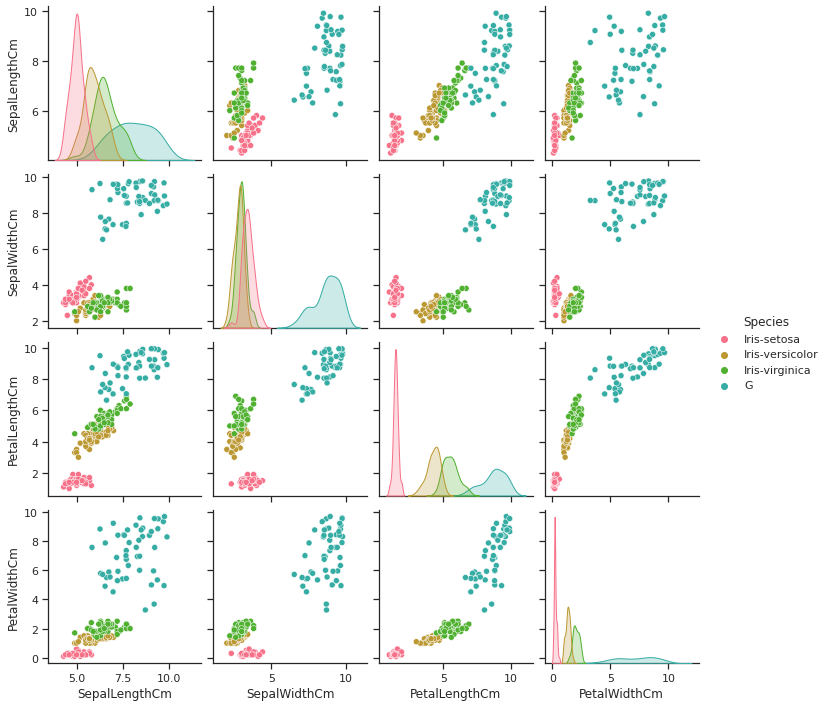

In [ ]:
import seaborn as sns
samples = samples * 10
print(samples)
labs = np.empty(([samples.shape[0], ]), dtype=str)
labs[:] = "G"

df = pd.DataFrame(data=samples, columns=df_iris.columns[0:4])
df[df_iris.columns[4]] = labs

df = pd.concat([df_iris, df])
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,0:5],hue="Species")